# **Lista 4 - Redes Neurais Artificiais**

## Aprendizagem de Máquina - 2022.1
## Matheus do Vale Almeida - 473219


---



In [121]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV

datasetQ1 = "concrete"
datasetQ2 = "vowel"

# Dados para a Questão 01 ======================================================
dataQ1 = np.genfromtxt(f"{datasetQ1}.csv", delimiter=',')
XQ1 = dataQ1[:,:-1]
yQ1 = dataQ1[:,-1].astype(int)

print(f"Número de amostras  - datasetQ1: {XQ1.shape[0]}")
print(f"Número de dimensões - datasetQ1: {XQ1.shape[1]}")
print(f"Número de classes   - datasetQ1: {np.unique(yQ1).shape[0]}\n")

# Dados para a Questão 02 ======================================================
dataQ2 = np.genfromtxt(f"{datasetQ2}.csv", delimiter=',')
XQ2 = dataQ2[:,:-1]
yQ2 = dataQ2[:,-1].astype(int)

print(f"Número de amostras  - datasetQ2: {XQ2.shape[0]}")
print(f"Número de dimensões - datasetQ2: {XQ2.shape[1]}")
print(f"Número de classes   - datasetQ2: {np.unique(yQ2).shape[0]}")

Número de amostras  - datasetQ1: 1030
Número de dimensões - datasetQ1: 8
Número de classes   - datasetQ1: 80

Número de amostras  - datasetQ2: 990
Número de dimensões - datasetQ2: 10
Número de classes   - datasetQ2: 11


## Divisão treino, validação e teste

In [122]:
#Normalização
escalaQ1 = StandardScaler()
escalaQ1.fit(XQ1)
XQ1_norm = escalaQ1.transform(XQ1)

escalaQ2 = StandardScaler()
escalaQ2.fit(XQ2)
XQ2_norm = escalaQ2.transform(XQ2)

In [123]:
np.random.seed(12345)

# Treino, validação e teste para a Questão 01 ==================================
XQ1_train, XQ1_test, yQ1_train, yQ1_test = train_test_split(XQ1_norm, yQ1, test_size=0.4)
#XQ1_train, XQ1_val_tes, yQ1_train, yQ1_val_tes = train_test_split(XQ1_norm, yQ1, test_size=0.4)
#XQ1_validacao, XQ1_test, yQ1_validacao, yQ1_test = train_test_split(XQ1_val_tes, yQ1_val_tes, test_size=0.5)

# Treino, validação e teste para a Questão 02 ==================================
XQ2_train, XQ2_test, yQ2_train, yQ2_test = train_test_split(XQ2_norm, yQ2, test_size=0.4)
#XQ2_train, XQ2_val_tes, yQ2_train, yQ2_val_tes = train_test_split(XQ2_norm, yQ2, test_size=0.4)
#XQ2_validacao, XQ2_test, yQ2_validacao, yQ2_test = train_test_split(XQ2_val_tes, yQ2_val_tes, test_size=0.5)

## Questão 01

---


In [124]:
distributions = {
    'hidden_layer_sizes': [(8,), (20,), (30,)],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 0.01, 0.001],
    'batch_size': [20, 32],
    'momentum': [0.6, 0.9],
}

regr = MLPRegressor(max_iter=1600)
rs = RandomizedSearchCV(regr, distributions, random_state=2)
search = rs.fit(XQ1_train, yQ1_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

{'activation': 'logistic',
 'alpha': 0.001,
 'batch_size': 32,
 'hidden_layer_sizes': (30,),
 'momentum': 0.9,
 'solver': 'sgd'}

In [125]:
rs_pred = rs.predict(XQ1_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yQ1_test, rs_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yQ1_test, rs_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yQ1_test, rs_pred)) 

Root Mean Squared Error: 5.9140813306455815
Mean Absolute Error: 4.274847260781287
Mean Squared Error: 34.97635798549061


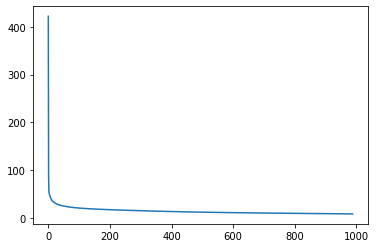

In [126]:
mlpRegr = MLPRegressor(max_iter=1600, activation='logistic', alpha=0.001, batch_size=32, hidden_layer_sizes=(30,), momentum=0.9, solver='sgd')

mlpRegr.fit(XQ1_train, yQ1_train)
plt.plot(mlpRegr.loss_curve_)

## Questão 02

---


In [127]:
distributionsQ2 = {
    'hidden_layer_sizes': [(8,), (20,), (30,)],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.1, 0.01, 0.001],
    'batch_size': [20, 32],
    'momentum': [0.6, 0.9],
}

clas = MLPClassifier(max_iter=1600)
rsClas = RandomizedSearchCV(clas, distributionsQ2, random_state=2)
searchQ2 = rsClas.fit(XQ2_train, yQ2_train)
searchQ2.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 32,
 'hidden_layer_sizes': (30,),
 'momentum': 0.6,
 'solver': 'adam'}

In [128]:
rsClas_pred = rsClas.predict(XQ2_test)

print(f"Accuracy: {metrics.accuracy_score(yQ2_test, rsClas_pred):.3f}")
print(metrics.classification_report(yQ2_test, rsClas_pred))

Accuracy: 0.949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.95      0.97      0.96        36
           2       0.93      0.98      0.95        41
           3       0.97      0.83      0.89        35
           4       1.00      0.93      0.96        42
           5       0.84      1.00      0.91        32
           6       0.93      0.89      0.91        44
           7       0.87      0.92      0.89        37
           8       1.00      0.97      0.98        33
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        27

    accuracy                           0.95       396
   macro avg       0.95      0.95      0.95       396
weighted avg       0.95      0.95      0.95       396



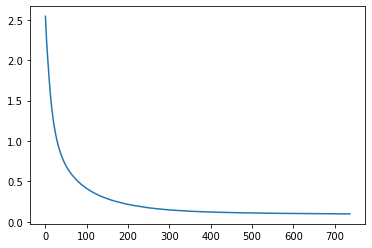

In [129]:
mlpClas = MLPClassifier(max_iter=1600, activation='relu', alpha=0.01, batch_size=32, hidden_layer_sizes=(30,), momentum=0.6, solver='adam')

mlpClas.fit(XQ2_train, yQ2_train)
plt.plot(mlpClas.loss_curve_)